This Notebook contains the code for my blog post on AutoEncoders. It uses the [Internet Advertisment](https://archive.ics.uci.edu/ml/datasets/Internet+Advertisements) data set from UC Irvine. Enjoy playing.

In [104]:
import pandas as pd
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

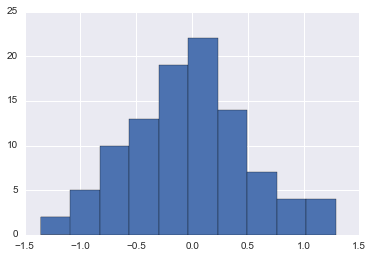

In [2]:
n_samples = 100

epsilon = rd.normal(scale=.5, size=n_samples)
x = np.linspace(-1, 1, n_samples)
y = 2*x + epsilon +.5
plt.hist(epsilon);

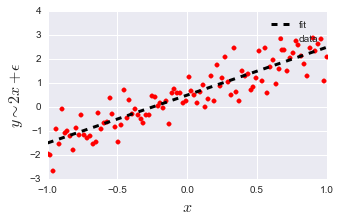

In [6]:
plt.figure(figsize=(5,3))
plt.scatter(x, y, color='r', label='data')
plt.plot(x, 2*x+.5, 'k--', linewidth = 3, label = 'fit');
plt.xlabel('$x$', fontsize = 16)
plt.ylabel('$y \sim 2x + \epsilon$', fontsize = 16)
plt.xlim([-1,1])
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
plt.legend(loc='best');

## Autoencoder

In [74]:
import requests

def download_file(url):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter
    r = requests.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                #f.flush() commented by recommendation from J.F.Sebastian
    return local_filename

download_file('http://archive.ics.uci.edu/ml/machine-learning-databases/internet_ads/ad.data')
download_file('http://archive.ics.uci.edu/ml/machine-learning-databases/internet_ads/ad.names')

'ad.names'

In [8]:
def get_column_names():
    return ["height",
            "width",
            "aratio",
            "local",
            "url/images_buttons",
            "url/likesbooks_com",
            "url/www_slake_com",
            "url/hydrogeologist",
            "url/oso",
            "url/media",
            "url/peace_images",
            "url/blipverts",
            "url/tkaine_kats",
            "url/labyrinth",
            "url/advertising_blipverts",
            "url/images_oso",
            "url/area51_corridor",
            "url/ran_gifs",
            "url/express-scripts_com",
            "url/off",
            "url/cnet",
            "url/time_1998",
            "url/josefina3",
            "url/truluck_com",
            "url/clawnext_gif",
            "url/autopen_com",
            "url/tvgen_com",
            "url/pixs",
            "url/heartland_5309",
            "url/meadows_9196",
            "url/blue",
            "url/ad_gif",
            "url/area51",
            "url/www_internauts_ca",
            "url/afn_org",
            "url/ran_org",
            "url/shareware_com",
            "url/baons_images",
            "url/area51_labyrinth",
            "url/pics",
            "url/image_navigate",
            "url/pool_images",
            "url/carousel_org",
            "url/members_accessus_net",
            "url/cmp_flowsoft010",
            "url/smallb_gif",
            "url/www_FlowSoft_com",
            "url/kandinsky",
            "url/csuhayward_edu",
            "url/www_yahoo_co_uk",
            "url/ibitexas_com",
            "url/www_haestad_com",
            "url/antiwar_com",
            "url/www_monmouth_com",
            "url/infoserver_etl_vt_edu",
            "url/geoguideii_tour",
            "url/heartland_pointe",
            "url/romancebooks_pix",
            "url/468x60",
            "url/ads_switchboard_com",
            "url/keith_dumble",
            "url/cqi_com",
            "url/images_ixfolder",
            "url/chat_b",
            "url/images_geoguideii",
            "url/preferences_com",
            "url/icsi_com",
            "url/pacific_net_sg",
            "url/monmouth_com",
            "url/wired_com",
            "url/go2net",
            "url/smiley_gif",
            "url/navigate_b",
            "url/sunsite_unc_edu",
            "url/www_pacific_net_sg",
            "url/home_gif",
            "url/library",
            "url/puc_edu",
            "url/internauts_ca",
            "url/www_worlddrugstore_com",
            "url/www_ibitexas_com",
            "url/ucsd_edu",
            "url/pitcairn_smallb",
            "url/kats",
            "url/cjackson_kandinsky",
            "url/tkaine_rings",
            "url/any_time",
            "url/FlowSoft_com",
            "url/geoguideii_nh",
            "url/charlie",
            "url/heartland_meadows",
            "url/home_netscape_com",
            "url/9439_butt2",
            "url/catringn_gif",
            "url/martnet",
            "url/doubleclick_net",
            "url/lycos_de",
            "url/catringn",
            "url/catring1",
            "url/fools_pixs",
            "url/logos",
            "url/private",
            "url/ng_spacedesc",
            "url/larx_com",
            "url/site",
            "url/pointe_1154",
            "url/banners",
            "url/pixs_smiley",
            "url/www_123greetings_com",
            "url/www_inwap_com",
            "url/cjackson",
            "url/labyrinth_9439",
            "url/generated_images",
            "url/image_ng",
            "url/lolnad_private",
            "url/library_pitcairn",
            "url/www_mei_co_jp",
            "url/april",
            "url/derived",
            "url/smiley",
            "url/home",
            "url/jsd",
            "url/sonic_net",
            "url/send_b",
            "url/website_ora_com",
            "url/pawbutton_gif",
            "url/victoria_pharmacy",
            "url/keith",
            "url/pages",
            "url/worlddrugstore_com",
            "url/geoguideii_email",
            "url/www_icgnet_com",
            "url/forum",
            "url/www_afn_org",
            "url/time",
            "url/www_ran_org",
            "url/main",
            "url/members_keith",
            "url/geoguideii_pages",
            "url/banner",
            "url/stinky_gra",
            "url/tkaine_buttons",
            "url/victoria",
            "url/kbell",
            "url/www_truluck_com",
            "url/img",
            "url/pics_cats",
            "url/alley",
            "url/claw1",
            "url/pharmacy_gif",
            "url/www_autopen_com",
            "url/images_img",
            "url/fbox_vt_edu",
            "url/unc_edu",
            "url/ics",
            "url/times",
            "url/forums",
            "url/chat",
            "url/images_go2net_com",
            "url/users_aol_com",
            "url/malek",
            "url/jsd_how",
            "url/www_cqi_com",
            "url/advertising_graphics",
            "url/pawbutton",
            "url/pictures",
            "url/grouper_com",
            "url/ads_media",
            "url/www_martnet_com",
            "url/set_butt",
            "url/how",
            "url/www_wednet_com",
            "url/www_globec_com_au",
            "url/athens",
            "url/info",
            "url/www_ireland-today_ie",
            "url/grn_bull",
            "url/sjsu_edu",
            "url/www_antiwar_com",
            "url/www_puc_edu",
            "url/sponsor",
            "url/www_news_com",
            "url/flowsoft010",
            "url/memberbanners",
            "url/red_ball",
            "url/ads_msn_com",
            "url/icons",
            "url/images",
            "url/access_ch",
            "url/irish_times",
            "url/media_images",
            "url/www_adamspharmacy_com",
            "url/geocities_com",
            "url/www_uk_lycos_de",
            "url/copymat_com",
            "url/hem1_passagen_se",
            "url/meadows",
            "url/grn",
            "url/gra",
            "url/vt_edu",
            "url/www_express-scripts_com",
            "url/imgs",
            "url/personal",
            "url/mindlink_net",
            "url/send",
            "url/pages_b",
            "url/accessus_net",
            "url/www_finest_tm_fr",
            "url/geoguideii_search",
            "url/polypkem",
            "url/fools",
            "url/www_larx_com",
            "url/marketplace",
            "url/wco_com",
            "url/off_gif",
            "url/tkaine_bars",
            "url/icgnet_com",
            "url/www_autotown_com",
            "url/generated",
            "url/9196_pawbutton",
            "url/geoguideii_chat",
            "url/www_vrn_de",
            "url/claw1_gif",
            "url/theinternetadvantage_com",
            "url/runofsite",
            "url/romancebooks",
            "url/foxy_net",
            "url/francois",
            "url/links",
            "url/athens_forum",
            "url/autotown_com",
            "url/logo",
            "url/members",
            "url/auto",
            "url/afn47757",
            "url/gifs",
            "url/esi",
            "url/hollywood",
            "url/forum_8078",
            "url/dept",
            "url/adamspharmacy_com",
            "url/valley",
            "url/www_pacificrim_net",
            "url/about",
            "url/www_likesbooks_com",
            "url/bossintl_com",
            "url/images_home",
            "url/wednet_com",
            "url/news_com",
            "url/arvann_images",
            "url/users",
            "url/netscape_com",
            "url/athens_8774",
            "url/pictures_gc",
            "url/butt",
            "url/e_gif",
            "url/sunsetstrip_alley",
            "url/geoguideii_send",
            "url/catring1_gif",
            "url/ball_gif",
            "url/bull",
            "url/paul_spu_edu",
            "url/rank",
            "url/2meta_com",
            "url/w_gif",
            "url/aol_com",
            "url/lg_gif",
            "url/irish-times_com",
            "url/irish",
            "url/ad_doubleclick_net",
            "url/ad_preferences_com",
            "url/bars",
            "url/forums_b",
            "url/gc_icon",
            "url/www_geocities_com",
            "url/www_carousel_org",
            "url/ball",
            "url/spu_edu",
            "url/com",
            "url/cnm",
            "url/htm_images",
            "url/htm_cmp",
            "url/cmp",
            "url/link_pics",
            "url/mindspring_com",
            "url/geoguideii_logo",
            "url/psu_edu",
            "url/go2net_ads",
            "url/www_grouper_com",
            "url/butt2",
            "url/cat",
            "url/www_dreamn_com",
            "url/vbtn_gif",
            "url/switchboard_com",
            "url/logo_b",
            "url/assets_images",
            "url/martnet_com",
            "url/buttons",
            "url/thejeep_com",
            "url/auto_generated",
            "url/search_b",
            "url/search",
            "url/pharmacy",
            "url/assets_auto",
            "url/static_wired_com",
            "url/cats",
            "url/bull_gif",
            "url/memberbanners_live",
            "url/pitcairn",
            "url/www_access_ch",
            "url/adv_images",
            "url/navigate",
            "url/runofsite_any",
            "url/dejay",
            "url/bishop",
            "url/email_b",
            "url/www_mcs_csuhayward_edu",
            "url/bin",
            "url/paris",
            "url/1154_graypaw",
            "url/stinky",
            "url/img_ads",
            "url/bds",
            "url/www_wco_com",
            "url/esi_image",
            "url/vrn_de",
            "url/www_toyotaofroswell_com",
            "url/www_copymat_com",
            "url/www_psnw_com",
            "url/go2net_com",
            "url/advertising",
            "url/slake_com",
            "url/www_theinternetadvantage_com",
            "url/baons",
            "url/geoguideii_rank",
            "url/butt2_gif",
            "url/tkaine",
            "url/art",
            "url/lovisa1",
            "url/pool",
            "url/valley_2647",
            "url/any",
            "url/corridor",
            "url/top",
            "url/rank_b",
            "url/pacificrim_net",
            "url/image",
            "url/heartland_valley",
            "url/tii",
            "url/123greetings_com",
            "url/adv",
            "url/ads",
            "url/hydrogeologist_imgs",
            "url/smallb",
            "url/members_tripod_com",
            "url/www_shareware_com",
            "url/images_ads",
            "url/banner_gif",
            "url/vbtn",
            "url/globec_com_au",
            "url/www_news-observer_com",
            "url/pointe",
            "url/mandypaul",
            "url/bds_s",
            "url/www_ems_psu_edu",
            "url/valley_2539",
            "url/members_aol_com",
            "url/yahoo_co_uk",
            "url/malek_small",
            "url/button",
            "url/msn_com",
            "url/graypaw_gif",
            "url/live",
            "url/haestad_com",
            "url/sanjosesabercats_com",
            "url/icon_gif",
            "url/april_fools",
            "url/assets",
            "url/set",
            "url/link",
            "url/wc",
            "url/uk",
            "url/sj",
            "url/images_set",
            "url/www_bossintl_com",
            "url/nh",
            "url/ng",
            "url/counter",
            "url/lg",
            "url/spacedesc",
            "url/bishop_red",
            "url/it",
            "url/ie",
            "url/rings",
            "url/gc",
            "url/peace",
            "url/dreamn_com",
            "url/ar",
            "url/ad",
            "url/thumb",
            "url/clawnext",
            "url/dumble",
            "url/kandinsky_t",
            "url/email",
            "url/martnet_images",
            "url/uk_gif",
            "url/red",
            "url/geoguideii_forums",
            "url/www_2meta_com",
            "url/ran",
            "url/ukonline_co_uk",
            "url/passagen_se",
            "url/psnw_com",
            "url/how_htm",
            "url/tm_fr",
            "url/sunsetstrip",
            "url/ora_com",
            "url/logo_gif",
            "url/marketing",
            "url/toyotaofroswell_com",
            "url/heartland",
            "url/ixfolder_gif",
            "url/mcet_edu",
            "url/enchantedforest",
            "url/alley_6750",
            "url/news-observer_com",
            "url/ireland-today_ie",
            "url/times_graphics",
            "url/madamecleo",
            "url/b_gif",
            "url/www_irish-times_com",
            "url/tripod_com",
            "url/ad_icons",
            "url/button_gif",
            "url/graypaw",
            "url/excite_com",
            "url/web_ukonline_co_uk",
            "url/polypkem_grn",
            "url/gort_ucsd_edu",
            "url/lolnad",
            "url/graphics_ad",
            "url/icon",
            "url/falcon_sonic_net",
            "url/picts",
            "url/phoenix_mcet_edu",
            "url/pix_b",
            "url/www_icsi_com",
            "url/ixfolder",
            "url/inwap_com",
            "url/www_cob_sjsu_edu",
            "url/pix",
            "url/www_thejeep_com",
            "url/tour",
            "url/www_sanjosesabercats_com",
            "url/mei_co_jp",
            "url/geoguideii",
            "url/small",
            "url/graphics",
            "url/kbell_charlie",
            "url/zueri_ch",
            "url/arvann",
            "origurl/labyrinth",
            "origurl/puc_edu",
            "origurl/charlie_charlie",
            "origurl/hevern_psychref",
            "origurl/and",
            "origurl/pterry_htm",
            "origurl/bishop",
            "origurl/ora_com",
            "origurl/www_nyx_net",
            "origurl/www_yahoo_co_uk",
            "origurl/www_truluck_com",
            "origurl/target_icon",
            "origurl/tkaine_sydkat",
            "origurl/meadows_9196",
            "origurl/top",
            "origurl/members_xoom_com",
            "origurl/0_rpp",
            "origurl/www_thriveonline_com",
            "origurl/adamspharmacy_com",
            "origurl/icsi_com",
            "origurl/tkaine_stvkat",
            "origurl/shareware_com",
            "origurl/e_html",
            "origurl/www_123greetings_com",
            "origurl/lofts_7119",
            "origurl/likesbooks_com",
            "origurl/gort_ucsd_edu",
            "origurl/users_aol_com",
            "origurl/www_innotts_co_uk",
            "origurl/roll_com",
            "origurl/web_ukonline_co_uk",
            "origurl/events",
            "origurl/www_2meta_com",
            "origurl/chuck_html",
            "origurl/paris",
            "origurl/chapel",
            "origurl/tii",
            "origurl/how_title",
            "origurl/www_news-observer_com",
            "origurl/alley",
            "origurl/april_fools",
            "origurl/carousel",
            "origurl/www_haestad_com",
            "origurl/title_html",
            "origurl/lemoyne_edu",
            "origurl/plains_5257",
            "origurl/psychref",
            "origurl/jun",
            "origurl/www_interchg_ubc_ca",
            "origurl/ukonline_co_uk",
            "origurl/www_lycos_co_uk",
            "origurl/lolnad_private",
            "origurl/ibitexas_com",
            "origurl/wco_com",
            "origurl/jsd",
            "origurl/www_rock_n_roll_com",
            "origurl/antiwar_com",
            "origurl/target",
            "origurl/phoenix_mcet_edu",
            "origurl/index",
            "origurl/1154_index",
            "origurl/pharmacy",
            "origurl/coltrane",
            "origurl/website_ora_com",
            "origurl/index_htm",
            "origurl/dept",
            "origurl/area51_labyrinth",
            "origurl/irish-times_com",
            "origurl/mandypaul",
            "origurl/pointe",
            "origurl/plato_htm",
            "origurl/arvann",
            "origurl/icon_0",
            "origurl/chapel_safehaven",
            "origurl/worldvillage_com",
            "origurl/nf_htm",
            "origurl/www_martnet_com",
            "origurl/hem1_passagen_se",
            "origurl/worlddrugstore_com",
            "origurl/www_globec_com_au",
            "origurl/athens_8774",
            "origurl/times_paper",
            "origurl/actup",
            "origurl/inwap",
            "origurl/main",
            "origurl/www_larx_com",
            "origurl/dumble_contents",
            "origurl/geocities_com",
            "origurl/4301_misfits2",
            "origurl/kattsida",
            "origurl/members_aol_com",
            "origurl/spu_edu",
            "origurl/sunsite_unc_edu",
            "origurl/valley_2647",
            "origurl/josefina3",
            "origurl/tkaine",
            "origurl/bonchin_cat",
            "origurl/chopin_htm",
            "origurl/punkie",
            "origurl/ubc_ca",
            "origurl/links_nf",
            "origurl/misfits2",
            "origurl/area51_vault",
            "origurl/kitty",
            "origurl/plato",
            "origurl/hollywood_7735",
            "origurl/link",
            "origurl/www_monmouth_com",
            "origurl/hist",
            "origurl/members_tripod_com",
            "origurl/www_ibitexas_com",
            "origurl/cgidir_dll",
            "origurl/heartland",
            "origurl/pages_catscats",
            "origurl/tkaine_linda",
            "origurl/crawler",
            "origurl/paul_spu_edu",
            "origurl/bishop_pterry",
            "origurl/carousel_org",
            "origurl/romance",
            "origurl/nyx_net",
            "origurl/hollywood",
            "origurl/simonc",
            "origurl/sox",
            "origurl/www_cob_sjsu_edu",
            "origurl/timeout_5",
            "origurl/leonora",
            "origurl/fh-rpl_de",
            "origurl/vt_edu",
            "origurl/ucsd_edu",
            "origurl/www_carousel_org",
            "origurl/www_antiwar_com",
            "origurl/FlowSoft_com",
            "origurl/kbell_charlie",
            "origurl/www_likesbooks_com",
            "origurl/labyrinth_9439",
            "origurl/www_icsi_com",
            "origurl/events_aprilfoolsday",
            "origurl/tii_tii",
            "origurl/athens_forum",
            "origurl/library",
            "origurl/valley",
            "origurl/ics_ikenobo",
            "origurl/unc_edu",
            "origurl/kandin",
            "origurl/bordeaux",
            "origurl/charlie",
            "origurl/6750_paws",
            "origurl/cccats",
            "origurl/linda_htm",
            "origurl/2647_coltrane",
            "origurl/vault_3440",
            "origurl/victoria_pharmacy",
            "origurl/wv",
            "origurl/kandin_html",
            "origurl/soho_lofts",
            "origurl/sunsetstrip_alley",
            "origurl/slake_com",
            "origurl/autotown_com",
            "origurl/www_sanjosesabercats_com",
            "origurl/infoserver_etl_vt_edu",
            "origurl/kushmerick",
            "origurl/www_toyotaofroswell_com",
            "origurl/turbo",
            "origurl/sw",
            "origurl/hills",
            "origurl/st",
            "origurl/mogwhi",
            "origurl/sj",
            "origurl/pointe_1154",
            "origurl/monmouth_com",
            "origurl/mei_co_jp",
            "origurl/sonic_net",
            "origurl/safehaven_index",
            "origurl/simonc_cybermog",
            "origurl/messier",
            "origurl/cybercats",
            "origurl/search",
            "origurl/heartland_5309",
            "origurl/psnw_com",
            "origurl/keith_dumble",
            "origurl/links",
            "origurl/nav",
            "origurl/nf",
            "origurl/sunsetstrip",
            "origurl/kandinsky",
            "origurl/meadows_3727",
            "origurl/www_afn_org",
            "origurl/southbeach",
            "origurl/pacific_net_sg",
            "origurl/heartland_pointe",
            "origurl/valley_2539",
            "origurl/catscats_html",
            "origurl/horn_html",
            "origurl/area51",
            "origurl/pages",
            "origurl/chopin",
            "origurl/it",
            "origurl/bonchin",
            "origurl/www_worldvillage_com",
            "origurl/00_html",
            "origurl/vrn_de",
            "origurl/home_netscape_com",
            "origurl/simstory_html",
            "origurl/biopic_htm",
            "origurl/dll",
            "origurl/cmeese_malibu",
            "origurl/ics",
            "origurl/linda",
            "origurl/fr",
            "origurl/private_biopic",
            "origurl/corridor_4590",
            "origurl/leonora_html",
            "origurl/dejay",
            "origurl/aprilfoolsday",
            "origurl/fools",
            "origurl/biopic",
            "origurl/lofts",
            "origurl/heartland_plains",
            "origurl/passagen_se",
            "origurl/djang",
            "origurl/5257_timstory",
            "origurl/5_hpe",
            "origurl/cybermog_htm",
            "origurl/area51_corridor",
            "origurl/yosemite_4301",
            "origurl/wosc_html",
            "origurl/rpp",
            "origurl/personal",
            "origurl/express-scripts_com",
            "origurl/madamecleo",
            "origurl/malibu",
            "origurl/sjsu_edu",
            "origurl/news",
            "origurl/www_ems_psu_edu",
            "origurl/7735_mcp",
            "origurl/sox_htm",
            "origurl/mcet_edu",
            "origurl/punkie_htm",
            "origurl/midnite",
            "origurl/foxy_net",
            "origurl/maple_lemoyne_edu",
            "origurl/times",
            "origurl/news_com",
            "origurl/4010_index",
            "origurl/www_slake_com",
            "origurl/larx_com",
            "origurl/www_FlowSoft_com",
            "origurl/paper",
            "origurl/members_keith",
            "origurl/paper_1998",
            "origurl/inwap_com",
            "origurl/www_tkz_fh-rpl_de",
            "origurl/members_accessus_net",
            "origurl/kattsida_html",
            "origurl/cjackson_kandinsky",
            "origurl/main_htm",
            "origurl/www_mei_co_jp",
            "origurl/www_adamspharmacy_com",
            "origurl/20_timeout",
            "origurl/corridor_5139",
            "origurl/falcon_sonic_net",
            "origurl/lycos_co_uk",
            "origurl/ran",
            "origurl/afn47757_midnite",
            "origurl/www_vrn_de",
            "origurl/5309_index",
            "origurl/stvkat_htm",
            "origurl/hpe",
            "origurl/wv_square",
            "origurl/keith",
            "origurl/www_pacificrim_net",
            "origurl/how",
            "origurl/www_metacrawler_com",
            "origurl/pacificrim_net",
            "origurl/5257_simstory",
            "origurl/cmeese",
            "origurl/metacrawler_com",
            "origurl/catscats",
            "origurl/wosc",
            "origurl/xoom_com",
            "origurl/innotts_co_uk",
            "origurl/paris_3963",
            "origurl/general_kushmerick",
            "origurl/mindlink_net",
            "origurl/cybermog",
            "origurl/kerouac_htm",
            "origurl/internauts_ca",
            "origurl/mcp",
            "origurl/martnet_com",
            "origurl/toyotaofroswell_com",
            "origurl/msheryl",
            "origurl/vault",
            "origurl/malibu_html",
            "origurl/jsd_how",
            "origurl/polypkem_index",
            "origurl/corridor",
            "origurl/zoe_html",
            "origurl/afn_org",
            "origurl/theinternetadvantage_com",
            "origurl/coltrane_htm",
            "origurl/timeout",
            "origurl/8078_home",
            "origurl/turbo_html",
            "origurl/heartland_meadows",
            "origurl/news-observer_com",
            "origurl/www_psnw_com",
            "origurl/contents_html",
            "origurl/tkaine_mogwhi",
            "origurl/stanford_edu",
            "origurl/www_bossintl_com",
            "origurl/general",
            "origurl/switchboard_com",
            "origurl/cgidir",
            "origurl/access_ch",
            "origurl/sydkat_htm",
            "origurl/hotsprings",
            "origurl/baons",
            "origurl/peace",
            "origurl/2647_chopin",
            "origurl/www_worlddrugstore_com",
            "origurl/actup_index",
            "origurl/bin_cgidir",
            "origurl/www_internauts_ca",
            "origurl/library_pitcairn",
            "origurl/inwap_cats",
            "origurl/lolnad",
            "origurl/pterry",
            "origurl/lovisa1",
            "origurl/www_dreamn_com",
            "origurl/polypkem",
            "origurl/tm_fr",
            "origurl/athens",
            "origurl/copymat_com",
            "origurl/soho",
            "origurl/victoria",
            "origurl/bossintl_com",
            "origurl/westhollywood",
            "origurl/private",
            "origurl/cat",
            "origurl/cats_htm",
            "origurl/malek_kandin",
            "origurl/yosemite",
            "origurl/www_inwap_com",
            "origurl/afn47757_plato",
            "origurl/timstory",
            "origurl/excite_com",
            "origurl/forum_8078",
            "origurl/cats",
            "origurl/kitty_and",
            "origurl/dreamn_com",
            "origurl/irish_times",
            "origurl/crawler_general",
            "origurl/bordeaux_actup",
            "origurl/hotsprings_4527",
            "origurl/kbell",
            "origurl/stinky_cats",
            "origurl/plains",
            "origurl/netscape_com",
            "origurl/csuhayward_edu",
            "origurl/safehaven",
            "origurl/tripod_com",
            "origurl/alley_6750",
            "origurl/sanjosesabercats_com",
            "origurl/www_news_com",
            "origurl/mogwhi_htm",
            "origurl/www_theinternetadvantage_com",
            "origurl/thejeep_com",
            "origurl/3963_leonora",
            "origurl/www_wednet_com",
            "origurl/autopen_com",
            "origurl/charlie_html",
            "origurl/forum",
            "origurl/kaitlin",
            "origurl/april",
            "origurl/grouper_com",
            "origurl/www_ran_org",
            "origurl/sydkat",
            "origurl/heartland_6712",
            "origurl/rpp_20",
            "origurl/2647_kaitlin",
            "origurl/psychref_html",
            "origurl/josefina3_horn",
            "origurl/malek",
            "origurl/stvkat",
            "origurl/timstory_html",
            "origurl/corp",
            "origurl/story",
            "origurl/thriveonline_com",
            "origurl/bds_punkie",
            "origurl/zoe",
            "origurl/kerouac",
            "origurl/123greetings_com",
            "origurl/2647_kerouac",
            "origurl/www_access_ch",
            "origurl/www_express-scripts_com",
            "origurl/paws",
            "origurl/wednet_com",
            "origurl/francois",
            "origurl/zdnet_com",
            "origurl/simstory",
            "origurl/www_puc_edu",
            "origurl/www_irish-times_com",
            "origurl/www_copymat_com",
            "origurl/cjackson",
            "origurl/kaitlin_htm",
            "origurl/tori_html",
            "origurl/southbeach_7597",
            "origurl/home_html",
            "origurl/hpe_10",
            "origurl/pad_htm",
            "origurl/psu_edu",
            "origurl/www_shareware_com",
            "origurl/bin",
            "origurl/arvann_pages",
            "origurl/tori",
            "origurl/dumble",
            "origurl/www_icgnet_com",
            "origurl/romancebooks",
            "origurl/3727_turbo",
            "origurl/football",
            "origurl/msheryl_djang",
            "origurl/zueri_ch",
            "origurl/aol_com",
            "origurl/bds",
            "origurl/cat_html",
            "origurl/and_tori",
            "origurl/hollywood_9662",
            "origurl/djang_html",
            "origurl/yahoo_co_uk",
            "origurl/truluck_com",
            "origurl/shtml",
            "origurl/link_chuck",
            "origurl/members",
            "origurl/www_thejeep_com",
            "origurl/2meta_com",
            "origurl/cats_html",
            "origurl/www_autopen_com",
            "origurl/hevern",
            "origurl/ikenobo",
            "origurl/accessus_net",
            "origurl/www_wco_com",
            "origurl/contents",
            "origurl/pitcairn",
            "origurl/westhollywood_4010",
            "origurl/messier_html",
            "origurl/icgnet_com",
            "origurl/mandypaul_main",
            "origurl/links_carousel",
            "origurl/square_chapel",
            "origurl/www_grouper_com",
            "origurl/6712_cats",
            "origurl/www_MeissnerChevrolet_autotown_com",
            "origurl/globec_com_au",
            "origurl/meadows",
            "origurl/afn47757",
            "origurl/www_geocities_com",
            "origurl/haestad_com",
            "origurl/midnite_htm",
            "origurl/tkaine_sox",
            "origurl/lovisa1_kattsida",
            "origurl/fr_bordeaux",
            "origurl/mindspring_com",
            "origurl/7597_kitty",
            "origurl/wired_com",
            "origurl/paws_pad",
            "origurl/irish",
            "origurl/square",
            "origurl/pad",
            "origurl/method",
            "origurl/www_mcs_csuhayward_edu",
            "origurl/www_pacific_net_sg",
            "origurl/chuck",
            "origurl/ran_org",
            "origurl/misfits2_htm",
            "origurl/stinky",
            "origurl/horn",
            "origurl/heartland_valley",
            "origurl/heartland_hills",
            "origurl/www_finest_tm_fr",
            "origurl/carousel_links",
            "origurl/kushmerick_method",
            "origurl/txt",
            "origurl/method_0",
            "origurl/title",
            "origurl/fbox_vt_edu",
            "origurl/index_html",
            "origurl/asp",
            "origurl/mcp_htm",
            "origurl/home",
            "origurl/netcenter",
            "origurl/hydrogeologist",
            "origurl/2539_index",
            "origurl/teams",
            "origurl/icon",
            "ancurl/search_direct",
            "ancurl/likesbooks_com",
            "ancurl/mirror",
            "ancurl/www_slake_com",
            "ancurl/cnet_cat",
            "ancurl/hydrogeologist",
            "ancurl/geoguide",
            "ancurl/2fcrawler",
            "ancurl/clawring_htm",
            "ancurl/tkaine_kats",
            "ancurl/labyrinth",
            "ancurl/clickthru_clickid",
            "ancurl/redirect",
            "ancurl/com_ads",
            "ancurl/area51_corridor",
            "ancurl/express-scripts_com",
            "ancurl/cnet",
            "ancurl/time_1998",
            "ancurl/josefina3",
            "ancurl/truluck_com",
            "ancurl/cgiadman",
            "ancurl/linkpg_htm",
            "ancurl/geoguide_rank",
            "ancurl/area51",
            "ancurl/www_internauts_ca",
            "ancurl/afn_org",
            "ancurl/www_microsoft_com",
            "ancurl/nph",
            "ancurl/ran_org",
            "ancurl/comprod_mirror",
            "ancurl/shareware_com",
            "ancurl/jump",
            "ancurl/area51_labyrinth",
            "ancurl/pics",
            "ancurl/nsads_hotwired_com",
            "ancurl/new",
            "ancurl/net",
            "ancurl/relocate_ad",
            "ancurl/sendform",
            "ancurl/carousel_org",
            "ancurl/members_accessus_net",
            "ancurl/home_htm",
            "ancurl/index_html",
            "ancurl/www_FlowSoft_com",
            "ancurl/kandinsky",
            "ancurl/csuhayward_edu",
            "ancurl/www_yahoo_co_uk",
            "ancurl/ibitexas_com",
            "ancurl/www_monmouth_com",
            "ancurl/infoserver_etl_vt_edu",
            "ancurl/heartland_pointe",
            "ancurl/msn",
            "ancurl/468x60",
            "ancurl/bin_click",
            "ancurl/general",
            "ancurl/keith_dumble",
            "ancurl/cqi_com",
            "ancurl/heartland_plains",
            "ancurl/redir",
            "ancurl/webring_org",
            "ancurl/uk_sv",
            "ancurl/mem",
            "ancurl/next",
            "ancurl/pacific_net_sg",
            "ancurl/monmouth_com",
            "ancurl/news",
            "ancurl/adclick",
            "ancurl/default",
            "ancurl/exe_cid",
            "ancurl/claw",
            "ancurl/bin_webring",
            "ancurl/emailbox",
            "ancurl/sunsite_unc_edu",
            "ancurl/exec_obidos",
            "ancurl/obidos",
            "ancurl/www_pacific_net_sg",
            "ancurl/library",
            "ancurl/puc_edu",
            "ancurl/internauts_ca",
            "ancurl/n_a",
            "ancurl/www_ibitexas_com",
            "ancurl/ucsd_edu",
            "ancurl/kats",
            "ancurl/cjackson_kandinsky",
            "ancurl/clickid",
            "ancurl/any_time",
            "ancurl/1_cid",
            "ancurl/ring",
            "ancurl/FlowSoft_com",
            "ancurl/nph_adclick",
            "ancurl/adclick_exe",
            "ancurl/event",
            "ancurl/general_site",
            "ancurl/2fclick",
            "ancurl/home_netscape_com",
            "ancurl/bin_homestead",
            "ancurl/click_runid",
            "ancurl/martnet",
            "ancurl/doubleclick_net",
            "ancurl/st_uk",
            "ancurl/catring_html",
            "ancurl/ng_spacedesc",
            "ancurl/familyid",
            "ancurl/yahoo",
            "ancurl/site",
            "ancurl/redirect_dll",
            "ancurl/pointe_1154",
            "ancurl/home_html",
            "ancurl/www_123greetings_com",
            "ancurl/cat_general",
            "ancurl/www_inwap_com",
            "ancurl/cjackson",
            "ancurl/labyrinth_9439",
            "ancurl/library_pitcairn",
            "ancurl/www_mei_co_jp",
            "ancurl/april",
            "ancurl/comprod",
            "ancurl/ukie",
            "ancurl/home",
            "ancurl/www_lycos_co_uk",
            "ancurl/jsd",
            "ancurl/ans_entry",
            "ancurl/keith",
            "ancurl/www_icgnet_com",
            "ancurl/forum",
            "ancurl/redirect_cgi",
            "ancurl/www_afn_org",
            "ancurl/geoguide_emailme",
            "ancurl/time",
            "ancurl/www_ran_org",
            "ancurl/main",
            "ancurl/members_keith",
            "ancurl/http_ad",
            "ancurl/2f_2fwww",
            "ancurl/ad_bin",
            "ancurl/www_amazon_com",
            "ancurl/4_mem",
            "ancurl/www_truluck_com",
            "ancurl/bridalinfo",
            "ancurl/pics_cats",
            "ancurl/direct",
            "ancurl/image_http",
            "ancurl/fbox_vt_edu",
            "ancurl/unc_edu",
            "ancurl/d_ukie",
            "ancurl/forums",
            "ancurl/co_uk",
            "ancurl/e_html",
            "ancurl/inwap_cats",
            "ancurl/malek",
            "ancurl/jsd_how",
            "ancurl/www_cqi_com",
            "ancurl/redirect_http",
            "ancurl/name",
            "ancurl/1_d",
            "ancurl/kat001",
            "ancurl/magic_adclick",
            "ancurl/grouper_com",
            "ancurl/readersndex_com",
            "ancurl/excite_468x60",
            "ancurl/click_ng",
            "ancurl/www_martnet_com",
            "ancurl/http_2f",
            "ancurl/direct_topic",
            "ancurl/how",
            "ancurl/www_wednet_com",
            "ancurl/www_globec_com_au",
            "ancurl/athens",
            "ancurl/info",
            "ancurl/schwab",
            "ancurl/sjsu_edu",
            "ancurl/www_puc_edu",
            "ancurl/a_uk",
            "ancurl/www_news_com",
            "ancurl/2fclick_ng",
            "ancurl/ads_msn_com",
            "ancurl/images",
            "ancurl/access_ch",
            "ancurl/home_ring",
            "ancurl/plug_go2net_com",
            "ancurl/geocities_com",
            "ancurl/geoguide_tour",
            "ancurl/copymat_com",
            "ancurl/www_webring_org",
            "ancurl/groupid_1",
            "ancurl/gif_pk",
            "ancurl/dll_cid",
            "ancurl/adid",
            "ancurl/vt_edu",
            "ancurl/worlddrug_com",
            "ancurl/edition",
            "ancurl/www_express-scripts_com",
            "ancurl/personal",
            "ancurl/gid",
            "ancurl/bin_geoguide",
            "ancurl/mindlink_net",
            "ancurl/accessus_net",
            "ancurl/type",
            "ancurl/ng_type",
            "ancurl/polypkem",
            "ancurl/fools",
            "ancurl/bin_cgiadman",
            "ancurl/marketplace",
            "ancurl/wco_com",
            "ancurl/links_html",
            "ancurl/tkaine_bars",
            "ancurl/icgnet_com",
            "ancurl/www_autotown_com",
            "ancurl/adcount_plx",
            "ancurl/1_familyid",
            "ancurl/yahoo_com",
            "ancurl/page",
            "ancurl/theinternetadvantage_com",
            "ancurl/runofsite",
            "ancurl/romancebooks",
            "ancurl/francois",
            "ancurl/links",
            "ancurl/athens_forum",
            "ancurl/site_sw",
            "ancurl/autotown_com",
            "ancurl/amazon_com",
            "ancurl/site_ne",
            "ancurl/qual",
            "ancurl/members",
            "ancurl/exe",
            "ancurl/pratchett",
            "ancurl/afn47757",
            "ancurl/esi",
            "ancurl/1154_linkpg",
            "ancurl/desc",
            "ancurl/forum_8078",
            "ancurl/topic",
            "ancurl/bin_acc",
            "ancurl/valley",
            "ancurl/delv",
            "ancurl/family",
            "ancurl/lspace_org",
            "ancurl/www_pacificrim_net",
            "ancurl/about",
            "ancurl/webring_ring",
            "ancurl/www_likesbooks_com",
            "ancurl/bossintl_com",
            "ancurl/runid",
            "ancurl/wednet_com",
            "ancurl/news_com",
            "ancurl/lycos_co_uk",
            "ancurl/arvann_images",
            "ancurl/526_redirect",
            "ancurl/ads_msn",
            "ancurl/netscape_com",
            "ancurl/athens_8774",
            "ancurl/click_profileid",
            "ancurl/qual_mc",
            "ancurl/homestead_ans",
            "ancurl/paul_spu_edu",
            "ancurl/dll",
            "ancurl/readersndex",
            "ancurl/dir",
            "ancurl/rank",
            "ancurl/2meta_com",
            "ancurl/Lpage_com",
            "ancurl/emailme",
            "ancurl/event_ng",
            "ancurl/3a_2fcrawler",
            "ancurl/cgiadman_dll",
            "ancurl/aol_com",
            "ancurl/lg_gif",
            "ancurl/magic",
            "ancurl/bin_ad",
            "ancurl/www_worlddrug_com",
            "ancurl/ring_midnight",
            "ancurl/irish-times_com",
            "ancurl/download",
            "ancurl/http_www",
            "ancurl/homepage",
            "ancurl/midnight_id",
            "ancurl/ad_doubleclick_net",
            "ancurl/exec",
            "ancurl/mem_1",
            "ancurl/msn_com",
            "ancurl/preferences",
            "ancurl/contact",
            "ancurl/bars",
            "ancurl/products",
            "ancurl/www_geocities_com",
            "ancurl/www_carousel_org",
            "ancurl/spu_edu",
            "ancurl/com",
            "ancurl/cnm",
            "ancurl/webring_home",
            "ancurl/link_pics",
            "ancurl/cid",
            "ancurl/psu_edu",
            "ancurl/ads_redirect",
            "ancurl/cfm",
            "ancurl/www_grouper_com",
            "ancurl/member",
            "ancurl/index",
            "ancurl/cat",
            "ancurl/www_dreamn_com",
            "ancurl/afn47757_clawring",
            "ancurl/switchboard_com",
            "ancurl/ad_preferences",
            "ancurl/inwap",
            "ancurl/adcount",
            "ancurl/martnet_com",
            "ancurl/thejeep_com",
            "ancurl/search",
            "ancurl/shtml",
            "ancurl/www_yahoo",
            "ancurl/desc_4",
            "ancurl/cats",
            "ancurl/pitcairn",
            "ancurl/www_access_ch",
            "ancurl/runofsite_any",
            "ancurl/url",
            "ancurl/dejay",
            "ancurl/gallery",
            "ancurl/bishop",
            "ancurl/features_forums",
            "ancurl/area",
            "ancurl/www_mcs_csuhayward_edu",
            "ancurl/bin",
            "ancurl/bds",
            "ancurl/www_wco_com",
            "ancurl/www_toyotaofroswell_com",
            "ancurl/www_copymat_com",
            "ancurl/go2net_com",
            "ancurl/delv_dir",
            "ancurl/slake_com",
            "ancurl/www_readersndex",
            "ancurl/www_theinternetadvantage_com",
            "ancurl/edition_cnet",
            "ancurl/tkaine",
            "ancurl/catring",
            "ancurl/asp",
            "ancurl/art",
            "ancurl/relocate",
            "ancurl/468x60_runofsite",
            "ancurl/valley_2647",
            "ancurl/any",
            "ancurl/ans",
            "ancurl/corridor",
            "ancurl/amp",
            "ancurl/top",
            "ancurl/pacificrim_net",
            "ancurl/image",
            "ancurl/heartland_valley",
            "ancurl/tii",
            "ancurl/123greetings_com",
            "ancurl/ads",
            "ancurl/www_yahoo_com",
            "ancurl/cuteftp",
            "ancurl/acc",
            "ancurl/bin_search",
            "ancurl/www_shareware_com",
            "ancurl/dir_qual",
            "ancurl/globec_com_au",
            "ancurl/www_news-observer_com",
            "ancurl/index_htm",
            "ancurl/xmission_com",
            "ancurl/ukie_s",
            "ancurl/629_redirect",
            "ancurl/pointe",
            "ancurl/www_ems_psu_edu",
            "ancurl/http_ads",
            "ancurl/members_aol_com",
            "ancurl/www_xmission_com",
            "ancurl/yahoo_co_uk",
            "ancurl/ring_kat001",
            "ancurl/msn_com",
            "ancurl/groupid",
            "ancurl/geoguide_geoguide",
            "ancurl/sanjosesabercats_com",
            "ancurl/excite",
            "ancurl/april_fools",
            "ancurl/slagen",
            "ancurl/link",
            "ancurl/tour_member",
            "ancurl/uk",
            "ancurl/people",
            "ancurl/sw",
            "ancurl/sv",
            "ancurl/st",
            "ancurl/sj",
            "ancurl/pl",
            "ancurl/pk",
            "ancurl/www_bossintl_com",
            "ancurl/ng",
            "ancurl/ne",
            "ancurl/mc",
            "ancurl/lg",
            "ancurl/spacedesc",
            "ancurl/it",
            "ancurl/ie",
            "ancurl/id",
            "ancurl/go",
            "ancurl/gg",
            "ancurl/homestead",
            "ancurl/bin_nph",
            "ancurl/peace",
            "ancurl/t_s",
            "ancurl/de",
            "ancurl/co",
            "ancurl/dreamn_com",
            "ancurl/plx_http",
            "ancurl/ad",
            "ancurl/rnd",
            "ancurl/dumble",
            "ancurl/kandinsky_p",
            "ancurl/linkpg",
            "ancurl/webring",
            "ancurl/ref",
            "ancurl/www_2meta_com",
            "ancurl/ran",
            "ancurl/ukonline_co_uk",
            "ancurl/www_Lpage_com",
            "ancurl/2fwww",
            "ancurl/ring_claw",
            "ancurl/midnight",
            "ancurl/hotwired_com",
            "ancurl/how_htm",
            "ancurl/tm_fr",
            "ancurl/ora_com",
            "ancurl/marketing",
            "ancurl/toyotaofroswell_com",
            "ancurl/heartland",
            "ancurl/s_b",
            "ancurl/mcet_edu",
            "ancurl/clickthru",
            "ancurl/enchantedforest",
            "ancurl/clawring",
            "ancurl/news-observer_com",
            "ancurl/plains",
            "ancurl/entry",
            "ancurl/acc_clickthru",
            "ancurl/3a",
            "ancurl/www_irish-times_com",
            "ancurl/2f",
            "ancurl/dll_type",
            "ancurl/soho",
            "ancurl/features",
            "ancurl/adclick_id",
            "ancurl/click",
            "ancurl/preferences_com",
            "ancurl/claw_id",
            "ancurl/url_http",
            "ancurl/microsoft_com",
            "ancurl/excite_com",
            "ancurl/web_ukonline_co_uk",
            "ancurl/gort_ucsd_edu",
            "ancurl/com_home",
            "ancurl/2fcgi",
            "ancurl/pub",
            "ancurl/bin_adcount",
            "ancurl/mc_3a",
            "ancurl/phoenix_mcet_edu",
            "ancurl/plx",
            "ancurl/inwap_com",
            "ancurl/www_cob_sjsu_edu",
            "ancurl/www_thejeep_com",
            "ancurl/tour",
            "ancurl/www_sanjosesabercats_com",
            "ancurl/mei_co_jp",
            "ancurl/geoguide_sendform",
            "ancurl/services",
            "ancurl/type_click",
            "ancurl/tagvalues",
            "ancurl/profileid",
            "ancurl/zueri_ch",
            "ancurl/arvann",
            "ancurl/tagvalues_13",
            "alt/your",
            "alt/and",
            "alt/top",
            "alt/all",
            "alt/email",
            "alt/out",
            "alt/our",
            "alt/here",
            "alt/the",
            "alt/download",
            "alt/netscape",
            "alt/what",
            "alt/explorer",
            "alt/more",
            "alt/for_a",
            "alt/take_a",
            "alt/kitty",
            "alt/visit_our",
            "alt/link",
            "alt/wacky",
            "alt/like",
            "alt/heartland",
            "alt/visit_the",
            "alt/romance",
            "alt/online",
            "alt/products",
            "alt/now",
            "alt/click_here",
            "alt/pages_like",
            "alt/rank",
            "alt/information",
            "alt/us",
            "alt/send_this",
            "alt/up",
            "alt/to",
            "alt/chat",
            "alt/new",
            "alt/net",
            "alt/my_site",
            "alt/search",
            "alt/this",
            "alt/on",
            "alt/of",
            "alt/links",
            "alt/bytes",
            "alt/my",
            "alt/me",
            "alt/picture",
            "alt/club",
            "alt/pages",
            "alt/this_page",
            "alt/in",
            "alt/on_the",
            "alt/guestbook",
            "alt/by",
            "alt/click",
            "alt/at",
            "alt/ad",
            "alt/mine",
            "alt/amazon_com",
            "alt/web",
            "alt/next",
            "alt/news",
            "alt/info",
            "alt/join",
            "alt/of_the",
            "alt/book",
            "alt/amazon",
            "alt/forums",
            "alt/back",
            "alt/next_site",
            "alt/a_tour",
            "alt/com",
            "alt/microsoft",
            "alt/geocities",
            "alt/ring",
            "alt/cat",
            "alt/send",
            "alt/internet_explorer",
            "alt/banner",
            "alt/home_page",
            "alt/internet",
            "alt/find",
            "alt/cool",
            "alt/my_guestbook",
            "alt/here_for",
            "alt/with",
            "alt/get",
            "alt/take",
            "alt/tour",
            "alt/site",
            "alt/to_visit",
            "alt/rank_my",
            "alt/from",
            "alt/page",
            "alt/graphic",
            "alt/like_mine",
            "alt/email_me",
            "alt/visit",
            "alt/free",
            "alt/the_kat",
            "alt/award",
            "alt/services",
            "alt/about",
            "alt/for",
            "alt/here_to",
            "alt/network",
            "alt/you",
            "alt/logo",
            "alt/home",
            "alt/kat",
            "caption/and",
            "caption/home_page",
            "caption/click_here",
            "caption/the",
            "caption/pratchett",
            "caption/here_for",
            "caption/site",
            "caption/page",
            "caption/to",
            "caption/of",
            "caption/home",
            "caption/my",
            "caption/your",
            "caption/in",
            "caption/bytes",
            "caption/here",
            "caption/click",
            "caption/for",
            "caption/you",
            "is_ad"]

In [75]:
ad_df = pd.read_csv('ad.data', names=get_column_names(), header=None, index_col=None, low_memory = False)
ad_df.head(2)

,height,width,aratio,local,url/images_buttons,url/likesbooks_com,url/www_slake_com,url/hydrogeologist,url/oso,url/media,...,caption/home,caption/my,caption/your,caption/in,caption/bytes,caption/here,caption/click,caption/for,caption/you,is_ad
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [77]:
import numpy as np
ad_df.replace(to_replace='[\s+]\?', value=np.nan, regex=True, inplace=True)
ad_df.replace(to_replace='[\s*]*nonad\.', value=0.0, regex=True, inplace=True)
ad_df.replace(to_replace='[\s*]*ad\.', value=1.0, regex=True, inplace=True)
ad_df = ad_df.apply(pd.to_numeric, errors='coerce').dropna().reset_index().drop('index', axis=1)

In [78]:
from sklearn.preprocessing import MinMaxScaler

label = ad_df.is_ad
mm_scaler = MinMaxScaler(feature_range=(-.5, .5))
scaled_ads = mm_scaler.fit_transform(ad_df.drop('is_ad', axis=1))

In [79]:
print ad_df.isnull().any().sum()
print ad_df.T.isnull().any().sum()

0
0


In [82]:
import matplotlib.pyplot as plt

In [87]:
from AutoEncoder import autoencoder as ae
import tensorflow as tf

network_architecture ={
    'n_input': scaled_ads.shape[1],
    'n_compressed': 2,
    'encoder': [100, 10],
    'decoder': [10, 100]
}
if (sae is not None) & (sae.sess._opened):
    sae.sess.close()
sae = ae.SimpleAutoencoder(network_architecture, weight_regularization=1.0, bias_regularization=0.1, batch_size=75, transfer_fct=tf.nn.softsign, tied=False)

encoder layer 1, dimensionality 1558 -> 100
encoder layer 2, dimensionality 100 -> 10
encoder layer 3, dimensionality 10 -> 2
decoder layer 1, dimensionality 2 -> 10
decoder layer 2, dimensionality 10 -> 100
decoder layer 3, dimensionality 100 -> 1558


In [88]:
schedule = {
    0: 0.001,
    250: 0.00025,
    2500: 0.0001,
    4000: 0.00005,
}

In [89]:
sae.train(scaled_ads, 5000, learning_rate=schedule, display_step=100)

Epoch: 0100 / 5000 cost= 941.563537598
Epoch: 0200 / 5000 cost= 941.295043945
Epoch: 0300 / 5000 cost= 939.427368164
Epoch: 0400 / 5000 cost= 839.958251953
Epoch: 0500 / 5000 cost= 794.062194824
Epoch: 0600 / 5000 cost= 772.354736328
Epoch: 0700 / 5000 cost= 759.709167480
Epoch: 0800 / 5000 cost= 750.501281738
Epoch: 0900 / 5000 cost= 728.667419434
Epoch: 1000 / 5000 cost= 713.891662598
Epoch: 1100 / 5000 cost= 681.036987305
Epoch: 1200 / 5000 cost= 666.991821289
Epoch: 1300 / 5000 cost= 654.505676270
Epoch: 1400 / 5000 cost= 757.416320801
Epoch: 1500 / 5000 cost= 632.578063965
Epoch: 1600 / 5000 cost= 716.299011230
Epoch: 1700 / 5000 cost= 621.297302246
Epoch: 1800 / 5000 cost= 608.466369629
Epoch: 1900 / 5000 cost= 603.032043457
Epoch: 2000 / 5000 cost= 596.925842285
Epoch: 2100 / 5000 cost= 627.740295410
Epoch: 2200 / 5000 cost= 582.601440430
Epoch: 2300 / 5000 cost= 580.469604492
Epoch: 2400 / 5000 cost= 571.159851074
Epoch: 2500 / 5000 cost= 643.445251465
Epoch: 2600 / 5000 cost= 

In [90]:
sae._recording['learning_rate_schedule']

{0: 0.001, 250: 0.00025, 2500: 0.0001, 4000: 5e-05}

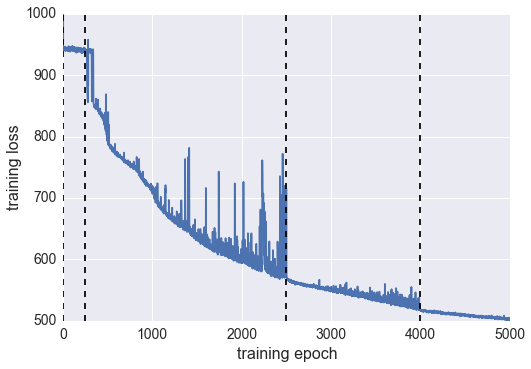

In [97]:
fig = plt.figure(figsize=(8, 5.5))
plt.plot(sae._recording['batch_cost']);
plt.ylim([500, 1000]);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('training loss', fontsize=16);
plt.xlabel('training epoch', fontsize=16);
for key in schedule.keys():
    plt.plot([key, key], [500, 1000], 'k--')

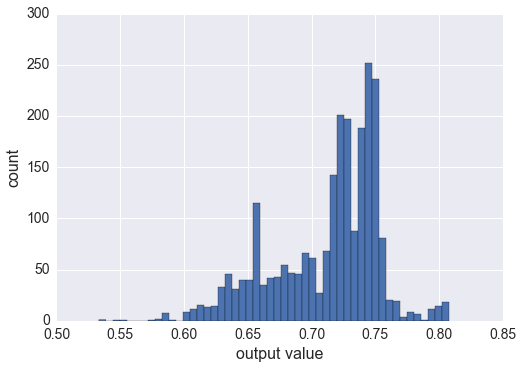

In [98]:
fig = plt.figure(figsize=(8, 5.5))
Y = sae._monitor_layer(scaled_ads, 1, network='encoder')
plt.hist(Y.__abs__().mean(axis=1), bins=50);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('count', fontsize=16);
plt.xlabel('output value', fontsize=16);

In [99]:
Y=sae.encode(scaled_ads)
scatter_Y = Y[(label!=-1).values]
scatter_label = label[(label!=-1).values]

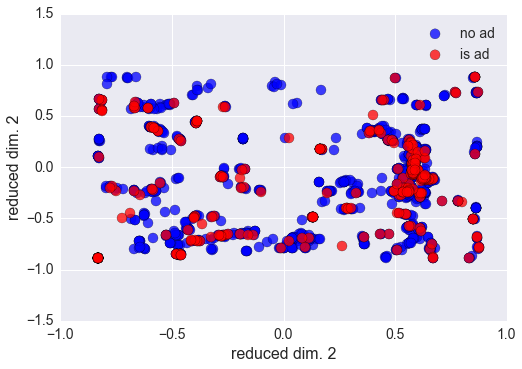

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(8, 5.5))


scatter_Y_0 = scatter_Y[(label==0).values]
plt.scatter(scatter_Y_0[:,0], scatter_Y_0[:,1], c='b', label='no ad', alpha=0.75, s=100);

scatter_Y_1 = scatter_Y[(label==1).values]
plt.scatter(scatter_Y_1[:,0], scatter_Y_1[:,1], c='r', label='is ad', alpha=0.75, s=100);


plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('reduced dim. 2', fontsize=16);
plt.xlabel('reduced dim. 2', fontsize=16);
plt.legend(loc='best', fontsize=14);